In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
print(iris.keys())
print(iris['filename'])
print(iris['data_module'])

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
sklearn.datasets.data


In [5]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
a = iris['data']
print(a.shape)
b = iris['target']
print(b.shape)
iris['feature_names']

(150, 4)
(150,)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.2,random_state=4)
print(a_train.shape,b_train.shape,a_test.shape,b_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier as kn
knn = kn(n_neighbors=1)
knn.fit(a_train,b_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
b_pred = knn.predict(a_test)
print(b_pred)
print(b_test)
b_pred == b_test

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [10]:
knn.score(a_test,b_test)

0.9333333333333333

In [11]:
knn.score(a_train,b_train)

1.0

Accuracy:0.93
Confusion Matrix : 
 [[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


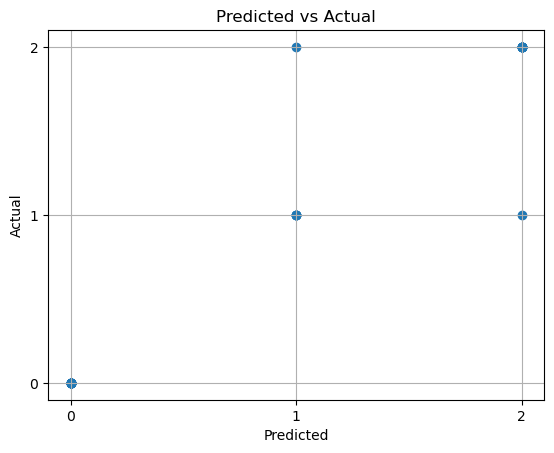

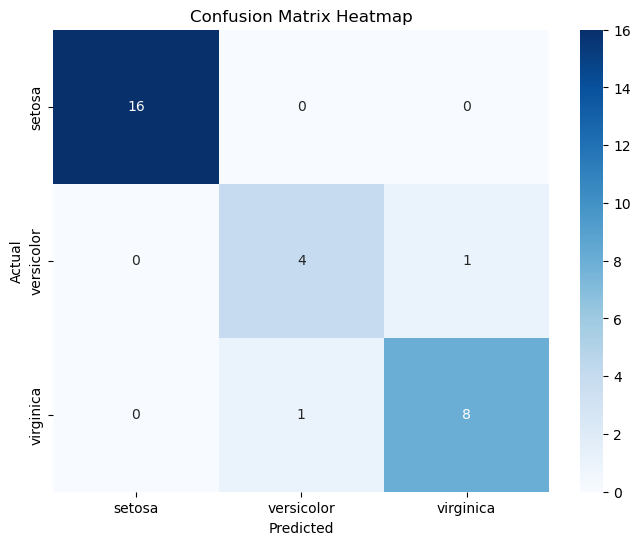

Classification Report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      0.80      0.80         5
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy:{accuracy:.2f}")

conf_matrix = confusion_matrix(b_test, b_pred)
print("Confusion Matrix : \n", conf_matrix)
plt.scatter(b_test,b_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.xticks(np.arange(min(b_test), max(b_test)+1))
plt.yticks(np.arange(min(b_pred),max(b_pred)+1))
plt.grid()
plt.show()
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

class_report = classification_report(b_test, b_pred, target_names=iris.target_names)
print("Classification Report : \n", class_report)
